Let's evaluate the quality of the resulting embeddings using clustering methods and metrics.

In [ ]:
from utils import (evaluate_with_clustering,
                   calculate_clustering_metrics
                   )

import pandas as pd
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

In [ ]:
user_embeddings_df = pd.read_csv('user_embeddings.csv')

In [ ]:
user_embeddings_df.head()

,user_id,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,...,dim_118,dim_119,dim_120,dim_121,dim_122,dim_123,dim_124,dim_125,dim_126,dim_127
0,2,0.205368,-0.058362,0.014116,0.008020,-0.019029,-0.186518,-0.243373,0.146498,-0.157733,...,0.038346,-0.153301,0.227227,-0.149909,0.063221,0.139966,0.011628,0.006004,0.172388,-0.096644
1,4,0.175410,-0.054420,0.012643,0.007730,-0.016947,-0.167381,-0.194009,0.120932,-0.148060,...,0.028110,-0.127624,0.176899,-0.130284,0.046048,0.116608,0.012064,0.003592,0.151402,-0.084944
2,5,0.192937,-0.060558,0.010036,0.002346,-0.019030,-0.172705,-0.231403,0.131822,-0.152338,...,0.028021,-0.129931,0.186014,-0.150944,0.050108,0.128086,0.013281,0.005094,0.166907,-0.102718
3,7,0.211159,-0.054828,0.016121,0.011377,-0.020051,-0.194791,-0.245245,0.155272,-0.159706,...,0.043337,-0.167930,0.247797,-0.149697,0.070335,0.146529,0.010862,0.006956,0.178403,-0.085005
4,21,0.194761,-0.056527,0.013672,0.008859,-0.018933,-0.186184,-0.222956,0.136262,-0.159186,...,0.034468,-0.146650,0.207728,-0.145551,0.056311,0.131146,0.012003,0.004518,0.168923,-0.092801


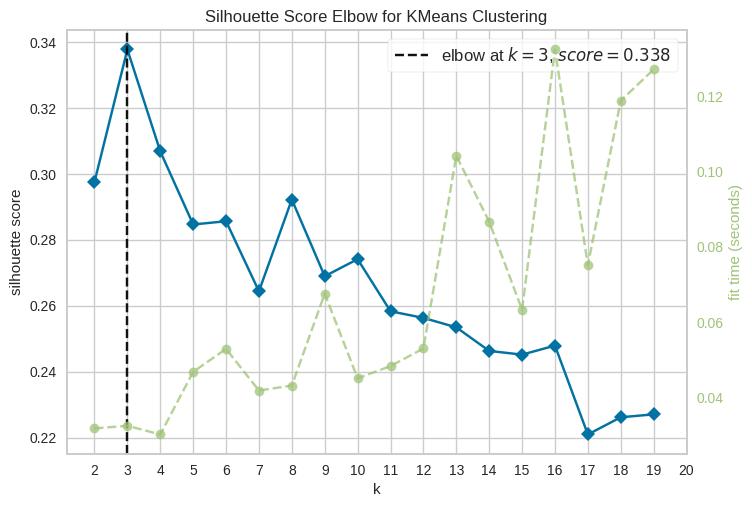

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(n_init = 'auto', init = 'k-means++', random_state = 88)
visualizer = KElbowVisualizer(model, k = (2, 20), metric = 'silhouette', timings = True)
visualizer.fit(user_embeddings_df.iloc[:, 1:].values)
plt.xticks(range(2, 21))
visualizer.show()

In [ ]:
NUM_CLUSTERS = 8

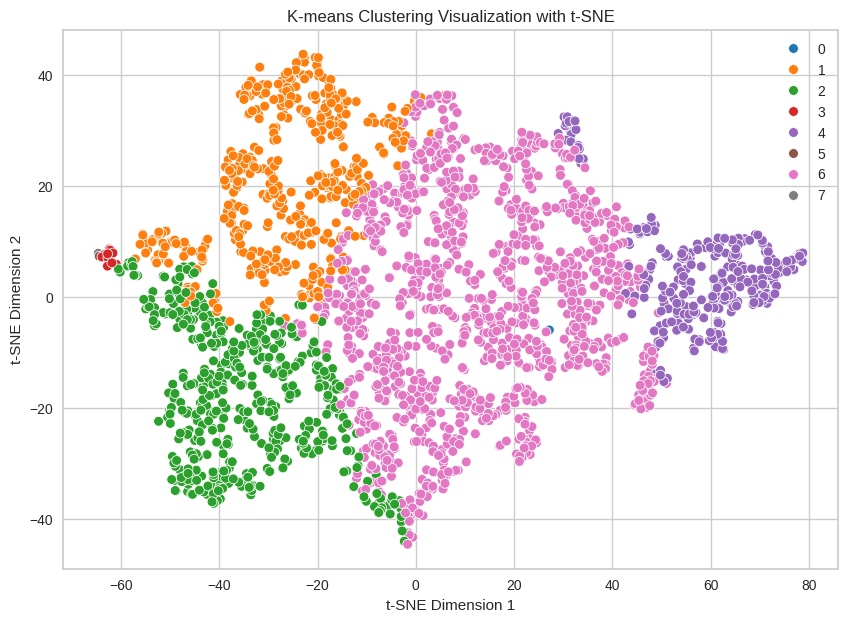

In [ ]:
evaluate_with_clustering(user_embeddings_df.iloc[:, 1:].values, num_clusters=NUM_CLUSTERS)

In [ ]:
metrics = calculate_clustering_metrics(user_embeddings_df.iloc[:, 1:].values, num_clusters=NUM_CLUSTERS)

print("Clustering Metrics:")
for metric, value in metrics.items():
    print(f"{metric}: {value:.4f}")

Clustering Metrics:
Silhouette Score: 0.2908
Calinski-Harabasz Index: 1007.0554
Davies-Bouldin Index: 0.7189
Mean Intra-Cluster Distance: 0.0967
Mean Inter-Cluster Distance: 1.6298
Dunn Index: 0.2544


The results suggest some interesting patterns in the structure of the user embeddings.

The high silhouette scores at k=3 and k=4 indicate that the dataset might naturally cluster into 3-4 major user segments. These could correspond to distinct viewing patterns, such as preferences for action vs. romance anime, or retro vs. modern anime.

The consistent silhouette scores for higher k-values suggest the presence of subclusters within these main groups, which might represent finer-grained differences, such as preferences for specific series or sub-genres. However, the drop in silhouette scores also indicates that higher k-values may introduce noise due to the inherent overlap in anime genres, as many shows span multiple categories.

While k=3 or k=4 provides broad segmentation, exploring higher k-values could uncover more nuanced user preferences, though these observations should be validated with real-world data or additional insights.